In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from numpy import linalg as LA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import  KernelRidge
from sklearn.linear_model import  HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [10]:
#Reading Input

df1 = pd.read_csv('Input.csv')

df1.rename(columns = {'TLI':'InletLiquidTemperature', 'TAI':'InletAirTemperature'
                   , 'H':'PackedBedHeight' , 'D':'PackedBedDiameter', 'ML':'LiquidMassFlow'
                   , 'MA':'AirMassFlow', 'EPS':'PackedBedPorosity'}, inplace = True)

X = df1.to_numpy() #Input

#Reading Output

df2 = pd.read_csv('Output.csv')

df2.rename(columns = {'TLO':'OutletLiquidTemperature', 'TAO':'OutletAirTemperature'}, inplace = True)

Y = df2.to_numpy() 
# Y = Y0[:,0]

df3 = pd.concat([df1, df2], axis=1, join="inner")



In [11]:
from sklearn.multioutput import MultiOutputRegressor
# Best linear estimation
reg = MultiOutputRegressor(LinearRegression()).fit(X, Y)
linear_score=reg.score(X, Y)
print(linear_score)

0.9393768905157627


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [7]:
my_stand_scaler_obj = StandardScaler()
my_stand_scaler_obj.fit(X_train)

# rescale the training data
X_stand_scaler = my_stand_scaler_obj.transform(X)

# rescale the training data
X_train_stand_scaler = my_stand_scaler_obj.transform(X_train)

# also, rescale the training data
X_test_stand_scaler = my_stand_scaler_obj.transform(X_test)


print(my_stand_scaler_obj.mean_)

[2.99968344e+01 5.99975269e+01 1.05504674e+05 7.49851614e-01
 2.34601212e-01 3.51592432e-02 3.72741437e-03 8.49934463e-01]


In [8]:
#KRR  = KernelRidge(alpha=.01, kernel='rbf')
sVR1 = SVR(kernel='rbf', degree=10, C=1.0, epsilon=1)
sVR2 = SVR(kernel='rbf', degree=10, C=1.0, epsilon=0.1)
sVR3 = SVR(kernel='rbf', degree=10, C=1.0, epsilon=0.01)
sVR4 = SVR(kernel='rbf', degree=10, C=1.0, epsilon=0.001)

In [ ]:

time_start = time.time()
train_sizes, train_scores, test_scores = learning_curve(sVR1,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        scoring="neg_mean_squared_error",
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

time_elapsed = (time.time() - time_start)
print('time_elapsed=', time_elapsed)

# Means and standard deviations of training set scores
train_mean1 = np.mean(train_scores, axis=1).reshape(-1,1)
# Means and standard deviations of test set scores
test_mean1 = np.mean(test_scores, axis=1).reshape(-1,1)



In [ ]:
time_start = time.time()
SVR1 = MultiOutputRegressor(SVR(kernel='rbf', degree=10, C=1.0, epsilon=1))#(kernel='poly', degree=5, C=1.0, epsilon=1))
SVR1.fit(X_train_stand_scaler,Y_train)
time_elapsed = (time.time() - time_start)
print('time_elapsed=', time_elapsed)




In [ ]:
Y_SVR_Predict=SVR1.predict(X_test_stand_scaler)
MSE_SVR=mean_squared_error(Y_test,Y_SVR_Predict)
# MAE_SVR=mean_absolute_error(Y_test,Y_SVR_Predict)
R2_SVR=r2_score(Y_test,Y_SVR_Predict)
Score_SVR=SVR1.score(X_test_stand_scaler,Y_test)
print(MSE_SVR)
# print(MAE_Lin)
print(R2_SVR)
print(Score_SVR)

In [36]:
train_sizes, train_scores, test_scores = learning_curve(sVR1,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        scoring="r2", 
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean1 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean1 = np.mean(test_scores, axis=1)

In [10]:
train_sizes, train_scores, test_scores = learning_curve(sVR2,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        scoring="neg_mean_squared_error", 
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean2 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean2 = np.mean(test_scores, axis=1)

In [11]:
train_sizes, train_scores, test_scores = learning_curve(sVR2,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        scoring="neg_mean_squared_error", 
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean2 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean2 = np.mean(test_scores, axis=1)

In [49]:
train_sizes, train_scores, test_scores = learning_curve(sVR3,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        scoring="neg_mean_squared_error", 
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean3 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean3 = np.mean(test_scores, axis=1)

In [59]:
A=test_mean3.reshape(-1,1)
D=train_mean3.reshape(-1,1)
A.shape
B=np.linspace(0.1, 0.9, 51).reshape(-1,1)

C=np.append(D,A,axis=1)
print(C)
C=np.append(C,B,axis=1)
print(C)

df = pd.DataFrame(C, columns = ['trainsize','Training MSE','Test MSE'])

[[-0.05352579 -3.7315348 ]
 [-0.05671947 -3.28292532]
 [-0.05675841 -3.33435038]
 [-0.05532767 -3.28586301]
 [-0.05588458 -3.2278776 ]
 [-0.0539419  -3.0371608 ]
 [-0.05374325 -3.02303774]
 [-0.05195105 -2.98408862]
 [-0.058554   -2.76572159]
 [-0.05704953 -2.73956764]
 [-0.05700031 -2.75313391]
 [-0.05668015 -2.61142395]
 [-0.05690107 -2.61401695]
 [-0.05608099 -2.61012475]
 [-0.05849976 -2.58099604]
 [-0.05704088 -2.02688663]
 [-0.05703821 -1.98399777]
 [-0.05586301 -1.96852157]
 [-0.05461757 -1.76932565]
 [-0.05491632 -1.76855043]
 [-0.05450232 -1.74885554]
 [-0.05475775 -1.63731243]
 [-0.05356401 -1.60266104]
 [-0.05338682 -1.60227042]
 [-0.05440188 -1.58432837]
 [-0.05325634 -1.5530809 ]
 [-0.05335919 -1.55193287]
 [-0.05287083 -1.55031231]
 [-0.05729303 -1.51821997]
 [-0.05844192 -1.46589037]
 [-0.05819606 -1.45528054]
 [-0.06088933 -1.42474396]
 [-0.06121278 -1.41743978]
 [-0.06101964 -1.41642574]
 [-0.06050589 -1.43972602]
 [-0.06296651 -0.77911505]
 [-0.06455265 -0.73766185]
 

In [40]:
train_sizes, train_scores, test_scores = learning_curve(sVR4,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        scoring="neg_mean_squared_error", 
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean4 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean4 = np.mean(test_scores, axis=1)

In [36]:
train_sizes, train_scores, test_scores = learning_curve(KRR,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        scoring="neg_mean_squared_error", 
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean5 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean5 = np.mean(test_scores, axis=1)

print(test_mean5)

[-197.93449512 -166.35152708 -160.21921902 -157.07981068 -151.07246373
 -149.75652142 -147.90388053 -146.77849113 -128.44595424 -124.96572075
 -123.97861853 -120.32033318 -119.69996784 -119.21923041  -89.98422501
  -80.44192144  -75.19833082  -73.92317101  -68.72536169  -67.29879484
  -67.11575363  -62.92136711  -61.61267273  -61.18232585  -60.18132609
  -60.03769489  -59.83624972  -59.56351492  -58.77670585  -55.53472812
  -55.47030905  -55.25265647  -55.22404755  -55.21458477  -36.23261538
  -22.21493925  -17.6354381   -16.50303408  -12.13169427  -11.10708465
  -10.89232846   -7.79756072   -7.26033471   -6.62692054   -6.22400539
   -6.04447386   -5.89995552   -5.92461338   -5.38511407   -5.18151085
   -4.32194421]


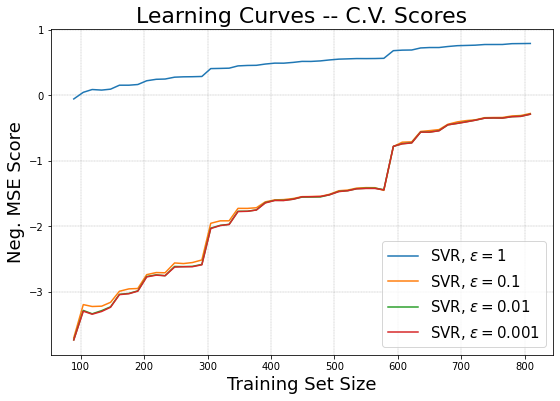

In [60]:
fig = plt.figure(figsize=(9, 6))

# draw basic lines
plt.plot(train_sizes, test_mean1, label='SVR, $\epsilon=1$')
plt.plot(train_sizes, test_mean2, label='SVR, $\epsilon=0.1$')
plt.plot(train_sizes, test_mean3, label='SVR, $\epsilon=0.01$')
plt.plot(train_sizes, test_mean4, label='SVR, $\epsilon=0.001$')
#plt.plot(train_sizes, test_mean4, label='Huber')
#plt.plot(train_sizes, test_mean5, '--', color='k', label='KRR, $\\alpha=0.01$')
         
plt.xlabel('Training Set Size',fontsize=18)
plt.ylabel('Neg. MSE Score',fontsize=18)
plt.title('Learning Curves -- C.V. Scores',fontsize=22)
plt.legend(loc="best",fontsize=15)
plt.grid(which='both',axis='both',color='grey', linestyle='--', linewidth=.3)

plt.savefig('LC_SVRs_MSE_kernels.png', dpi=400, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)

In [16]:
test_mean1

array([-3.81363687, -3.44520687, -3.3351376 , -3.37027344, -3.33372229,
       -3.11874824, -3.11919246, -3.09150391, -2.89018685, -2.81239196,
       -2.80422047, -2.69990291, -2.68076894, -2.67696932, -2.67103035,
       -2.22023873, -2.21616168, -2.20862234, -2.07648557, -2.0494336 ,
       -2.0419495 , -1.96783786, -1.92073046, -1.92355402, -1.8791481 ,
       -1.81445087, -1.81747507, -1.78977426, -1.7065723 , -1.66736197,
       -1.65004935, -1.62209243, -1.61933381, -1.61563874, -1.60547006,
       -1.12080858, -1.09122864, -1.07900381, -0.94610803, -0.91721895,
       -0.91548398, -0.85501724, -0.80146896, -0.78668432, -0.76735672,
       -0.72426774, -0.72408779, -0.72309461, -0.67122054, -0.66503754,
       -0.64769975])

C:\Users\abedimah\AppData\Local\Temp/ipykernel_13592/769071955.py:82: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('LC_SVRs_R2_kernels.png', dpi=600, facecolor='w', edgecolor='w',


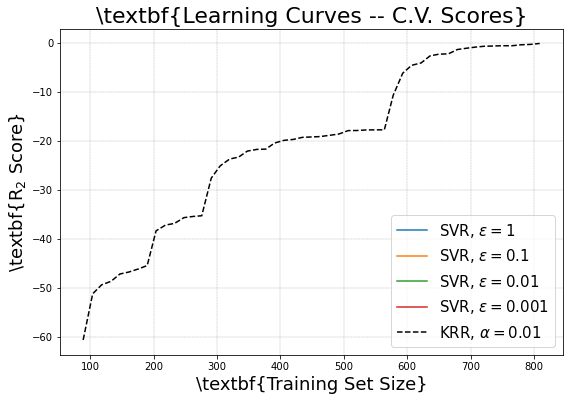

In [35]:
#%%############################################################################


# Notice how this is set up - there are a lot of options, which makes the ML workflow
# complex, but also very powerful.
# from sklearn.metrics import mean_squared_log_error

train_sizes, train_scores, test_scores = learning_curve(sVR1,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean1 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean1 = np.mean(test_scores, axis=1)



train_sizes, train_scores, test_scores = learning_curve(sVR2,
                                                        X_stand_scaler, Y,
                                                        cv = 10, 
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean2 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean2 = np.mean(test_scores, axis=1)


train_sizes, train_scores, test_scores = learning_curve(sVR3,
                                                        X_stand_scaler, Y,
                                                        cv = 10, 
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean3 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean3 = np.mean(test_scores, axis=1)


train_sizes, train_scores, test_scores = learning_curve(sVR4,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean4 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean4 = np.mean(test_scores, axis=1)


train_sizes, train_scores, test_scores = learning_curve(KRR,
                                                        X_stand_scaler, Y,
                                                        cv = 10,
                                                        train_sizes = np.linspace(0.1, 0.9, 51))

# Means and standard deviations of training set scores
train_mean5 = np.mean(train_scores, axis=1)
# Means and standard deviations of test set scores
test_mean5 = np.mean(test_scores, axis=1)


#%%############################################################################

fig = plt.figure(figsize=(9, 6))

# draw basic lines
plt.plot(train_sizes, test_mean1, label='SVR, $\epsilon=1$')
plt.plot(train_sizes, test_mean2, label='SVR, $\epsilon=0.1$')
plt.plot(train_sizes, test_mean3, label='SVR, $\epsilon=0.01$')
plt.plot(train_sizes, test_mean4, label='SVR, $\epsilon=0.001$')
#plt.plot(train_sizes, test_mean4, label='Huber')
plt.plot(train_sizes, test_mean5, '--', color='k', label='KRR, $\\alpha=0.01$')
         
plt.xlabel('\\textbf{Training Set Size}',fontsize=18)
plt.ylabel('\\textbf{R$_2$ Score}',fontsize=18)
plt.title('\\textbf{Learning Curves -- C.V. Scores}',fontsize=22)
plt.legend(loc="best",fontsize=15)
plt.grid(which='both',axis='both',color='grey', linestyle='--', linewidth=.3)

plt.savefig('LC_SVRs_R2_kernels.png', dpi=400, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)

In [ ]:
svR1=MultiOutputRegressor(sVR1)

In [ ]:
## Arr=train_sizes.reshape(-1,1)
Arr=np.append(Arr,train_mean1.reshape(-1,1),axis=1)
Arr=np.append(Arr,test_mean1.reshape(-1,1),axis=1)

In [35]:
df = pd.DataFrame(Arr)
df

,0,1,2
0,89.0,-0.410292,-3.817107
1,104.0,-0.380078,-3.448083
2,118.0,-0.357629,-3.335625
3,133.0,-0.363311,-3.369098
4,147.0,-0.362649,-3.328696
5,161.0,-0.352235,-3.113739
6,176.0,-0.352873,-3.114069
7,190.0,-0.352236,-3.084201
8,204.0,-0.343108,-2.882202
9,219.0,-0.331745,-2.805627
